In [73]:
using Plots
using JLD2
using LaTeXStrings
using Statistics
using Polynomials
using LinearAlgebra

In [ ]:
include("parameters.jl")
using .MyParams

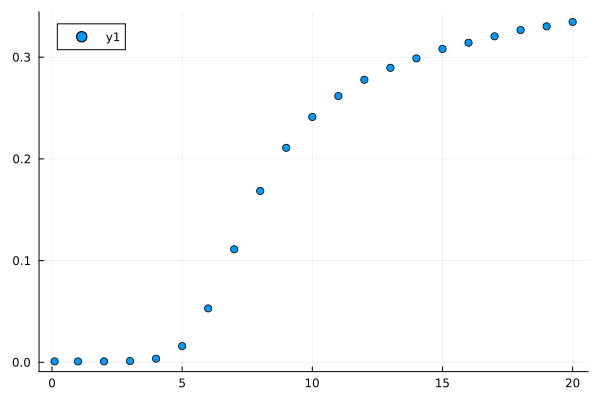

In [ ]:
final_sz_values = Float64[]
case = 2
Ω_crit = 5.24
for Ω in Ω_values
    file_name = "sz_mean_steady_for_$(case)D,Ω=$(Ω).jld2"
    @load file_name t sz_mean_mean
    global sz_mean_mean = sz_mean_mean
    global t = t
    push!(final_sz_values, last(sz_mean_mean))
end
Ω_values_normalized = Ω_values
scatter(Ω_values_normalized,final_sz_values)

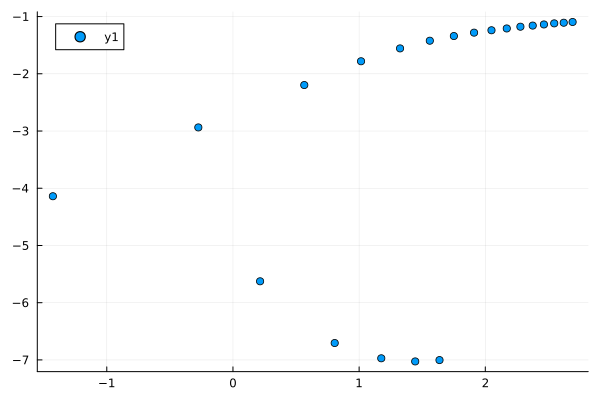

In [362]:
x = log.(abs.(Ω_values_normalized .- Ω_crit))
y = log.(final_sz_values)
filtered_indices = findall(y .> -10)  # Indices where the condition holds
filtered_x = x[filtered_indices]    # Corresponding x values
filtered_y = y[filtered_indices]    # Corresponding y values
scatter(
    filtered_x, filtered_y,
    #ylim=[-3.0,-1.0]
)

The slope (beta) is: 0.5834326323754121


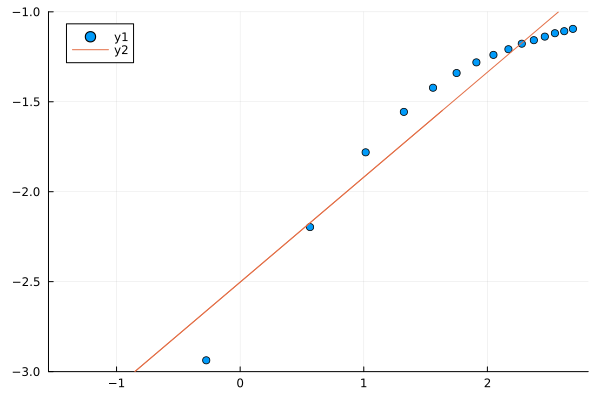

In [337]:
p = fit(filtered_x, filtered_y, 1)
beta = coeffs(p)[2]
println("The slope (beta) is: $beta")
plot!(x,p.(x))

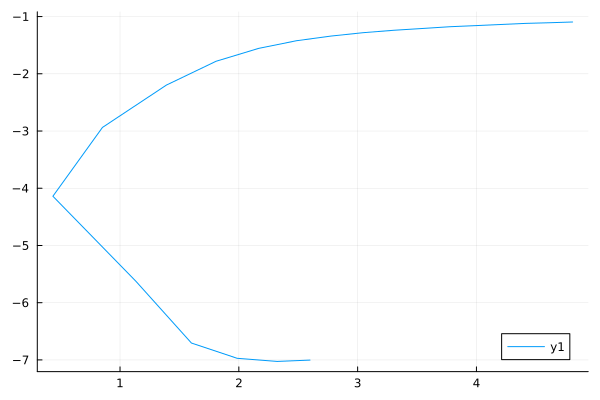

In [ ]:
plot(
    abs.(Ω_values .- Ω_crit).^beta, log.(final_sz_values)
)

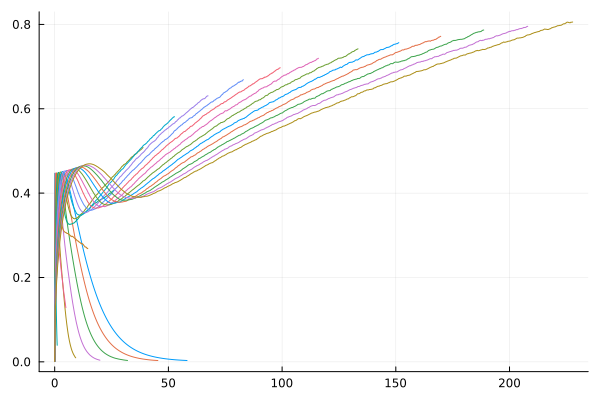

In [358]:
delta = 0.451
plt = plot(
    legend = false, 
    #xscale=:log10,
    #yscale=:log10,
)

for Ω in Ω_values
    try
        file_name = "sz_mean_steady_for_$(case)D,Ω=$(Ω).jld2"
        @load file_name t sz_mean_mean
        plot!(plt, t .* (abs.(Ω - Ω_crit)^(beta/delta)) .+ 1e-3, t .^ delta .* vec(sz_mean_mean) .+ 1e-3, label = "Ω = $Ω")
    catch e
        println("Could not load or plot for $(case)D Ω = $Ω: ", e)
    end
end

display(plt)